In [30]:
import math
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import IntProgress
from IPython.display import display
import time

def total_area(par_a):
    '''
    define the sampling area
    '''
    [r_min, r_max, z_min, z_max] = par_a
    
    return (r_max - r_min) * (z_max - z_min)

def total_samplecount(par_a,par_d):
    '''
    define the sampling area
    '''
    [r_min, r_max, z_min, z_max] = par_a
    r_len = math.floor((r_max - r_min)/par_d)
    z_len = math.floor((z_max - z_min)/par_d)
    return  r_len* z_len

def mandelbrot_area(par_mandel,par_sizecount,par_area):
    '''
    define the sampling area
    '''
    if par_sizecount == 0:
        return 0
    if par_mandel.ndim < 1:
        return par_mandel
    elif  par_mandel.ndim == 1:
        mandel_in_area = sum(1-par_mandel)
    elif  par_mandel.ndim == 2:
        mandel_in_area = sum(sum(1-par_mandel)) 
    elif  par_mandel.ndim == 3:
        mandel_in_area = sum(sum(sum(1-par_mandel)))
    elif  par_mandel.ndim >3:
        print("too many dimensions!")
        return 0
    ret_area = (mandel_in_area/par_sizecount) * par_area
    return  ret_area

    

def grid(par_a, par_d):
    '''
    define grid for the sampling area
    '''
    [r_min, r_max, z_min, z_max] = par_a
    
    r_axis = np.arange(r_min, r_max + par_d, par_d)
    z_axis = np.arange(z_min, z_max + par_d, par_d)
    
    zz, rr = np.meshgrid(z_axis, r_axis)
    
    return zz, rr

def mandel(par_x,par_c):
    '''
    next step in mandelbrot iteration
    '''
    [x_r,x_z] = par_x
    [c_r,c_z] = par_c
    
    return [x_r**2 - x_z**2 + c_r, 2 * x_r * x_z + c_z]


def mandel_cond(par_x):
    '''
    define the breaking condition
    '''
    [x_r,x_z] = par_x
    
    magn = (x_r**2 + x_z**2)**0.5
    if magn > 2:
        return 1
    
    return 0
    
           
           
def mandel_i(par_c,par_i):
    '''
    define the iteration loop breaking after i iterations
    '''
    x = [0, 0]
    for _ in range(par_i):
        x = mandel(x, par_c)
        
        cond = mandel_cond(x)
        if cond:
            return 1
    
    return 0
    
    
def mandel_a(par_a, par_i, par_d):
    '''
    define the iteration loop for a square of size a with spacing d
    '''
    [r_min, r_max, z_min, z_max] = par_a
    r_axis = np.arange(r_min, r_max + par_d, par_d)
    z_axis = np.arange(z_min, z_max + par_d, par_d)
    
    plane = np.zeros((len(r_axis), len(z_axis)))
    
    for r in range(len(r_axis)):
        for z in range(len(z_axis)):
            c = [r_axis[r], z_axis[z]]
            
            result = mandel_i(c, par_i)
            plane[r, z] = result
    
    return plane
    
    
def func_j_i(par_a,par_i,par_d):
    '''
    Define function considering the improvement after j steps
    returning the area for all precisions until i
    '''
    f = IntProgress(min=0, max=par_i+1) # instantiate the bar
    display(f)
    loc_tot_area = total_area(par_a)
    loc_sizecount = total_samplecount(par_a,par_d)
    ret_area = []
    for loc_j in range(par_i+1):
        f.value +=1
        loc_mandel = mandel_a(par_a, loc_j, par_d)
        ret_area.append(mandelbrot_area(loc_mandel,loc_sizecount,loc_tot_area))
    ret_area = ret_area - ret_area[-1]
    return ret_area
    
    
def func_s_d(par_a,par_i,par_s,par_step_size = 1000):
    '''
    pure random sampling
    Define function considering the improvement after j steps
    returning the area for all precisions until i
    '''
    f = IntProgress(min=0, max=par_s+1) # instantiate the bar
    display(f)
    loc_tot_area = total_area(par_a)
    ret_area = []
    step_size = par_step_size
    
    for loc_s in range(1,par_s +step_size,step_size):
        #for each loc_s get random c in area 
        
        f.value = loc_s
        loc_mandel = []
        for loc_sub_s in range(loc_s):
            loc_r = (par_a[1]-par_a[0]) * np.random.rand() + par_a[0]
            loc_z = (par_a[3]-par_a[2]) * np.random.rand() + par_a[2]
            loc_sample = [loc_r,loc_z]
            loc_mandel.append(mandel_i(loc_sample, par_i))
            
        print 
        ret_area.append(mandelbrot_area(np.array(loc_mandel),loc_s,loc_tot_area))

    ret_area = ret_area - ret_area[-1]
    return abs(ret_area)

def func_s_d_log(par_a,par_i,par_s):
    '''
    pure random sampling
    Define function considering the improvement after j steps
    returning the area for all precisions until i
    '''
    f = IntProgress(min=0, max=par_s+1) # instantiate the bar
    display(f)
    loc_tot_area = total_area(par_a)
    ret_area = []
    
    for loc_s in range(1,par_s):
        #for each loc_s get random c in area 
        
        f.value = loc_s
        loc_mandel = []
        sample_size = 2**loc_s
        for loc_sub_s in range(sample_size):
            loc_r = (par_a[1]-par_a[0]) * np.random.rand() + par_a[0]
            loc_z = (par_a[3]-par_a[2]) * np.random.rand() + par_a[2]
            loc_sample = [loc_r,loc_z]
            loc_mandel.append(mandel_i(loc_sample, par_i))
            
        print 
        ret_area.append(mandelbrot_area(np.array(loc_mandel),sample_size,loc_tot_area))

    ret_area = ret_area - ret_area[-1]
    return abs(ret_area)




IntProgress(value=0, max=21)

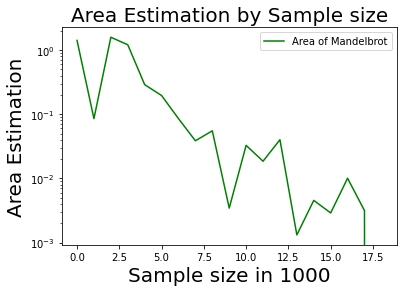

In [91]:
area = [-2, 1, -1, 1]     # Edges of the area
spacing = 0.01            # Distance between 2 point on the grid

In [5]:
mandel_plane = mandel_a(area, 100, spacing)

In [7]:
loc_sizecount = total_samplecount(area,spacing)
mandelbrot_area(mandel_plane,loc_sizecount,total_area(area))

1.5477

In [33]:
zz, rr = grid(area, spacing)

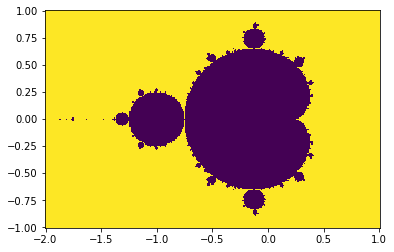

In [34]:
fig = plt.figure()
ax = plt.gca()

pc = ax.pcolormesh(rr, zz, mandel_plane)
plt.show()

In [47]:
area_estimate_i = func_j_i(area, 100, spacing)

IntProgress(value=0, max=101)

KeyboardInterrupt: 

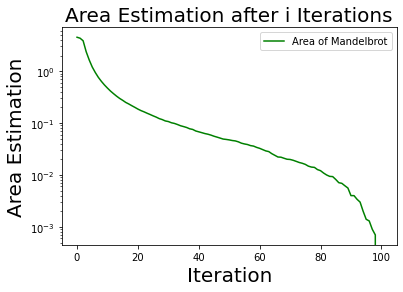

In [45]:

plt.semilogy(area_estimate_i,'g-',label= "Area of Mandelbrot")
plt.title("Area Estimation after i Iterations",size=20)
plt.xlabel('Iteration',size=20)
plt.ylabel('Area Estimation',size=20)
plt.legend()
#fig.savefig('figure1.png', dpi=300)
plt.show()

In [ ]:
area = [-2, 1, -1, 1]
np.random.seed(1337)
area_estimate_d = func_s_d_log(area, 50, 20)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib_inline\backend_inline.py:234: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  for label in axis.get_ticklabels()])


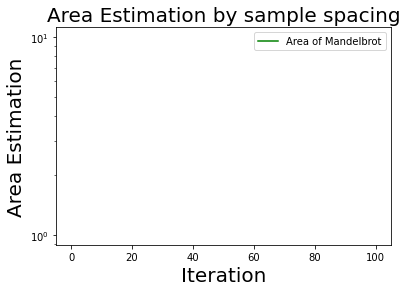

In [38]:
plt.semilogy(area_estimate_d,'g-',label= "Area of Mandelbrot")

#plt.loglog(area_estimate_d,'g-',label= "Area of Mandelbrot")
plt.title("Area Estimation by Sample size",size=20)
plt.xlabel('Sample size in 1000',size=20)
plt.ylabel('Area Estimation',size=20)
plt.legend()
#fig.savefig('figure1.png', dpi=300)
plt.show()